# Información.

Integrantes: Noir Nicolás, González Ignacio

Materia: Minería de datos

Año: 2024



# Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from graphviz import Source

### 1 Descargar el conjunto de datos, 1000_Companies. para realizar el trabajo práctico. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

In [ ]:
df_comp = pd.read_csv('https://raw.githubusercontent.com/Nicolas-Noir/Archivos-TUIA-2024-2do-cuatrimestre/main/1000_Companies.csv')
df_pokemon = pd.read_csv('https://raw.github.com/Nicolas-Noir/Archivos-TUIA-2024-2do-cuatrimestre/main/PokemonDBCart.csv')

In [ ]:
df_comp_ord = pd.get_dummies(df_comp, columns=['State'])

label_encoder = LabelEncoder()
df_comp['State_codif'] = label_encoder.fit_transform(df_comp['State'])

x_train, x_test, y_train, y_test = train_test_split(df_comp_ord.drop(['State_California','State_Florida','State_New York'], axis=1), df_comp['State_codif'], test_size=0.3, random_state=7655377)
x_test1, x_test2, y_test1, y_test2 = train_test_split(x_test, y_test, test_size=0.5, random_state=62342)
x_train.shape, x_test1.shape, x_test2.shape, y_train.shape, y_test1.shape, y_test2.shape

((700, 4), (150, 4), (150, 4), (700,), (150,), (150,))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 413 to 114
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       700 non-null    float64
 1   Administration  700 non-null    float64
 2   MarketingSpend  700 non-null    float64
 3   Profit          700 non-null    float64
dtypes: float64(4)
memory usage: 27.3 KB


In [ ]:
x_train.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,700.000000,700.000000,700.000000,700.000000
mean,80584.456900,122722.576009,223957.835954,118491.282037
std,46370.871254,13198.022478,90995.386779,42695.426211
min,0.000000,51283.140000,0.000000,14681.400000
25%,41767.000000,116403.688075,148569.283250,84714.086830
50%,79143.000000,122145.294350,223015.769500,117166.480300
75%,122710.250000,128715.964825,304990.159125,153676.757775
max,162597.700000,321652.140000,443898.530000,476485.430000


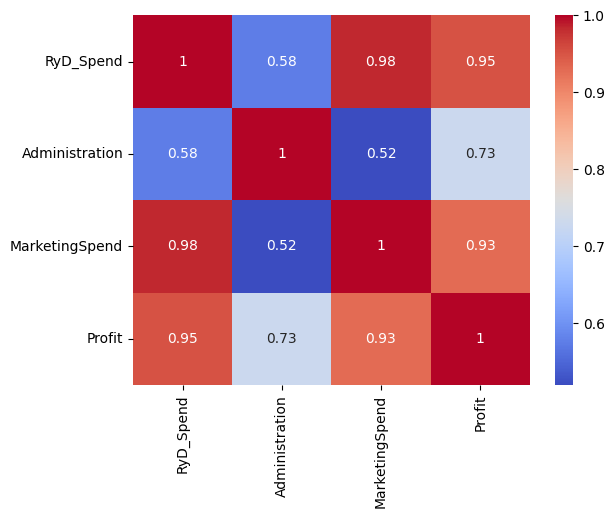

In [ ]:
matriz = x_train[['RyD_Spend','Administration','MarketingSpend','Profit']].corr()
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.show()

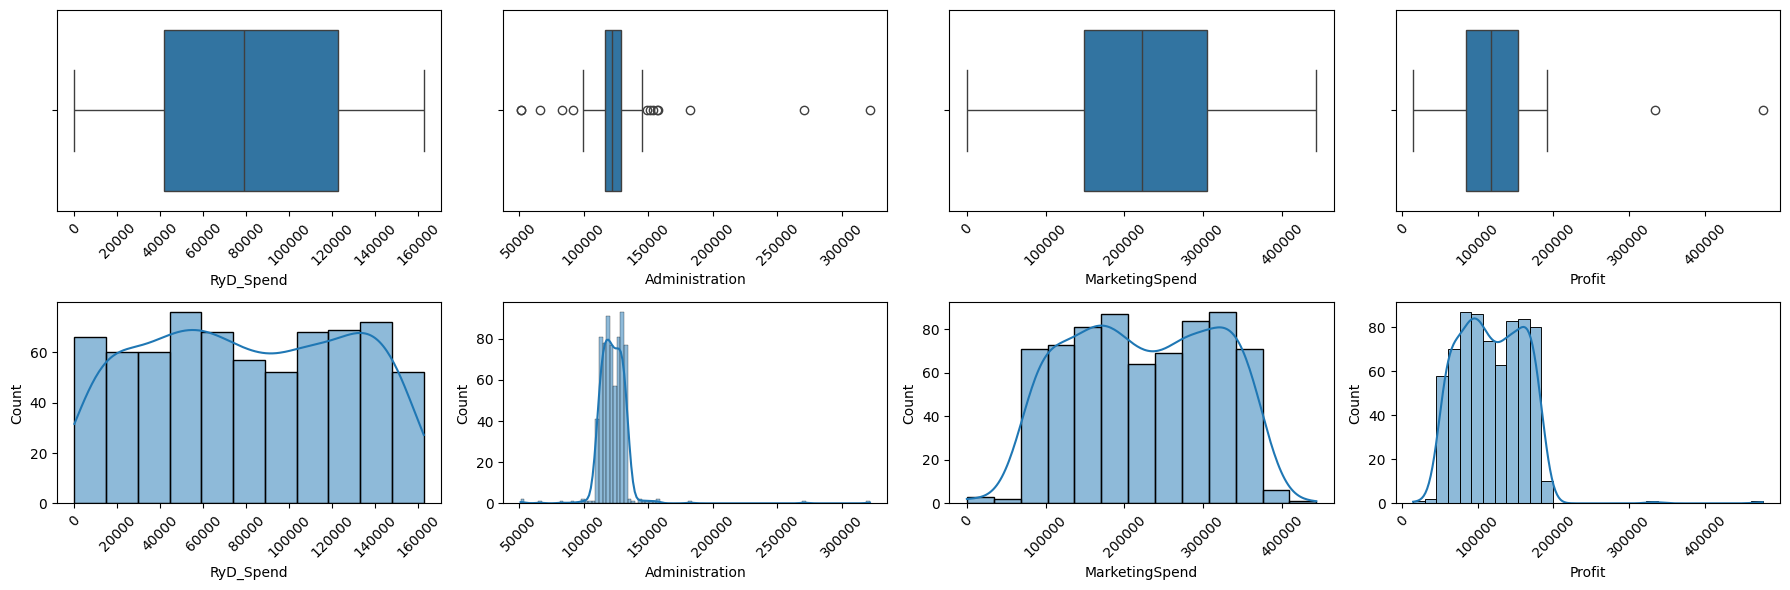

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

for i, name in enumerate(x_train[['RyD_Spend','Administration','MarketingSpend','Profit']]):

    sns.boxplot(x=name, data=x_train, orient='h', ax=axes[0, i])
    axes[0, i].tick_params(axis='x', rotation=45)

    sns.histplot(x=name, data=x_train, ax=axes[1, i], kde=True)
    axes[1, i].tick_params(axis='x', rotation=45)


fig.tight_layout()
plt.show()

In [ ]:
scaler = MinMaxScaler()
x_train_scal = scaler.fit_transform(x_train)
x_test_scal1 = scaler.transform(x_test1)
x_test_scal2 = scaler.transform(x_test2)

## 2 Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión)

In [ ]:
#arreglar (anda como el orto)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

decision_tree_pokemon_reg = DecisionTreeRegressor(random_state=5232)

param_grid = {
    'max_depth': [1,2,3,4, 5, 6, 7, 8, 9,10,11],
    'min_samples_leaf': [1,2,3,4,5, 6, 7,8,9,10,11],
    'min_samples_split': [2,3,4,5, 6,7,8,9,10,11],  # min_samples_split debe ser >= 2 para evitar errores

    'criterion': ['squared_error', 'absolute_error', 'friedman_mse']  # Para regresión
}

grid_search = GridSearchCV(estimator=decision_tree_pokemon_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=4, n_jobs=-1)

grid_search.fit(x_train_scal, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'squared_error', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
decision_tree_regresion = tree.DecisionTreeRegressor(max_depth=14, min_samples_leaf=6, min_samples_split=2, min_weight_fraction_leaf =0.0, criterion='squared_error', random_state=629426)

decision_tree_regresion.fit(x_train_scal, y_train)

DecisionTreeRegressor(max_depth=14, min_samples_leaf=6, random_state=629426)

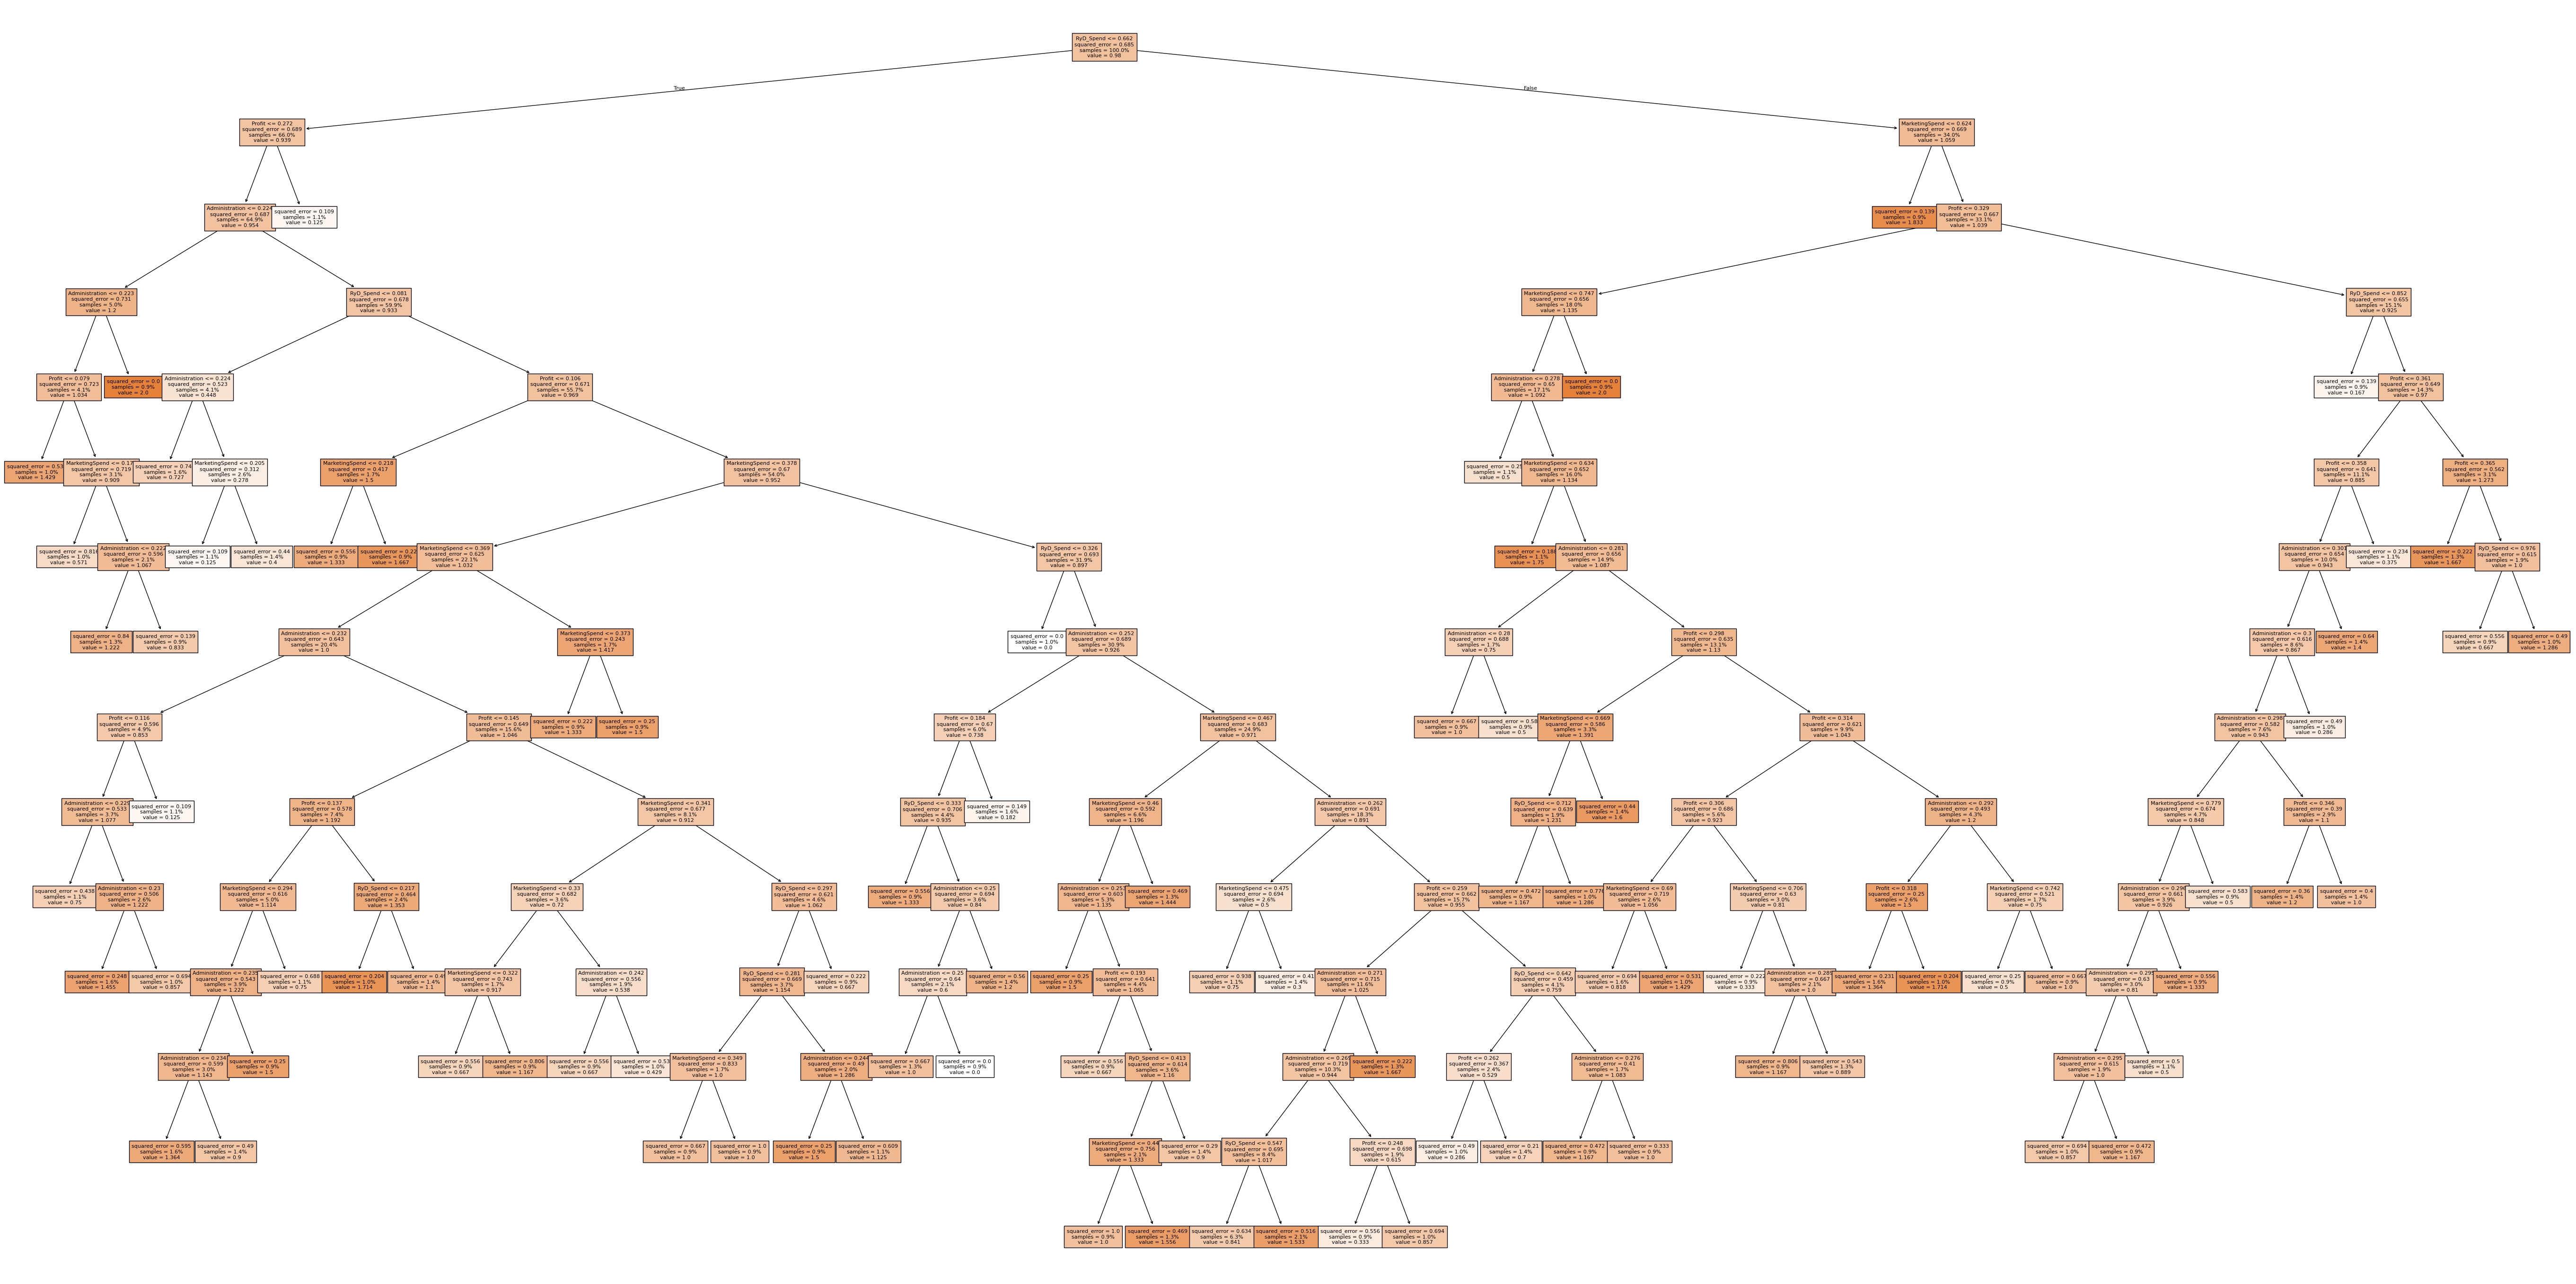

In [ ]:
features = list(x_train.columns)
plt.figure(figsize=(70,35))
tree.plot_tree(decision_tree_regresion, feature_names=features, fontsize=8, filled=True, rounded=False, proportion=True)
plt.show()

In [ ]:
prediccion_test_1 = decision_tree_regresion.predict(x_test_scal1)
prediccion_test_2 = decision_tree_regresion.predict(x_test_scal2)

mae_test_1 = mean_absolute_error(y_test1, prediccion_test_1)
mae_test_2 = mean_absolute_error(y_test2, prediccion_test_2)

mse_test_1 = mean_squared_error(y_test1, prediccion_test_1)
mse_test_2 = mean_squared_error(y_test2, prediccion_test_2)

rmse_test_1 = np.sqrt(mse_test_1)
rmse_test_2 = np.sqrt(mse_test_2)


#print(f'Primer conjunto de test:\t Segundo conjunto de test:\nMAE: {mae_test_1}\t\t {mae_test_2}\nMSE: {mse_test_1}\t\t {mse_test_2}\nRMSE: {rmse_test_1}\t\t {rmse_test_2}')

valores_conj_res = {'Test 1':[mae_test_1,mse_test_1,rmse_test_1], 'Test 2':[mae_test_2,mse_test_2,rmse_test_2]}
df_conj_res = pd.DataFrame(valores_conj_res, index=['MAE', 'MSE', 'RMSE'])
df_conj_res

,Test 1,Test 2
MAE,0.826188,0.800394
MSE,0.969540,0.874701
RMSE,0.984652,0.935254


## 3

* Descargar el conjunto de datos, PokemonDBCart. para realizar el trabajo práctico.

* Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.).

* Generar dos conjuntos de datos considerando 80-20 y 70-30 para entrenar y evaluar los modelos.

## Segundo conjunto de datos (Pokemones)

In [ ]:
label_encoder = LabelEncoder()
df_pokemon['TipoPokemon_codif'] = label_encoder.fit_transform(df_pokemon['TipoPokemon'])

df_pokemon_sin_nombre = df_pokemon.drop(['Nombre'], axis=1)
df_pokemon_ord = pd.get_dummies(df_pokemon_sin_nombre, columns=['TipoPokemon'])

df_pokemon_sin_nombre['TipoPokemon_codif'] = label_encoder.fit_transform(df_pokemon_sin_nombre['TipoPokemon'])

x_train_pokemon, x_test_pokemon, y_train_pokemon, y_test_pokemon = train_test_split(df_pokemon_ord.drop(['TipoPokemon_agua','TipoPokemon_bicho','TipoPokemon_electrico','TipoPokemon_fuego','TipoPokemon_hierba','TipoPokemon_normal','TipoPokemon_psiquico','TipoPokemon_roca'], axis=1), df_pokemon_sin_nombre['TipoPokemon_codif'], test_size=0.3, random_state=3425)
x_test_pokemon1, x_test_pokemon2, y_test_pokemon1, y_test_pokemon2 = train_test_split(x_test_pokemon, y_test_pokemon, test_size=0.5, random_state=9678)
x_train_pokemon.shape, x_test_pokemon1.shape, x_test_pokemon2.shape, y_train_pokemon.shape, y_test_pokemon1.shape, y_test_pokemon2.shape

((335, 7), (72, 7), (72, 7), (335,), (72,), (72,))

In [ ]:
x_train_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 308 to 297
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Ataque             335 non-null    int64
 1   Defensa            335 non-null    int64
 2   Velocidad          335 non-null    int64
 3   HP                 335 non-null    int64
 4   SpAtaque           335 non-null    int64
 5   SpDefensa          335 non-null    int64
 6   TipoPokemon_codif  335 non-null    int64
dtypes: int64(7)
memory usage: 20.9 KB


In [ ]:
x_train_pokemon.describe()

,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa,TipoPokemon_codif
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,72.794030,69.683582,64.692537,67.355224,72.214925,71.149254,3.214925
std,29.981071,29.388298,28.706304,25.951863,30.944248,28.377721,2.332102
min,10.000000,10.000000,5.000000,20.000000,10.000000,20.000000,0.000000
25%,50.000000,49.000000,45.000000,50.000000,50.000000,50.000000,1.000000
50%,68.000000,65.000000,63.000000,65.000000,65.000000,67.000000,3.000000
75%,90.000000,85.000000,85.000000,79.000000,91.500000,88.500000,5.000000
max,181.000000,230.000000,151.000000,255.000000,194.000000,230.000000,7.000000


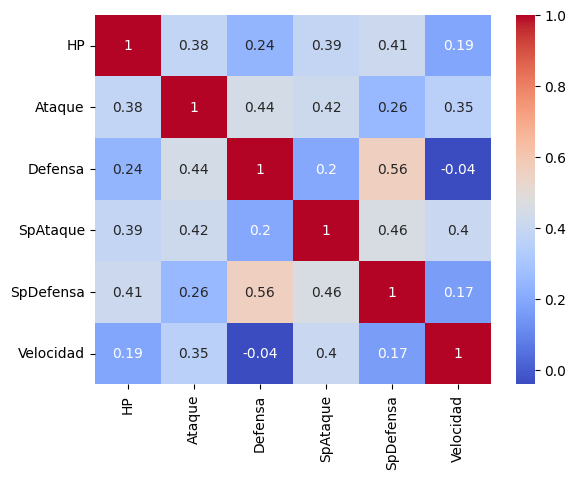

In [ ]:
matriz_pokemon = x_train_pokemon[['HP','Ataque','Defensa','SpAtaque','SpDefensa' ,'Velocidad']].corr()
sns.heatmap(matriz_pokemon, annot=True, cmap='coolwarm')
plt.show()

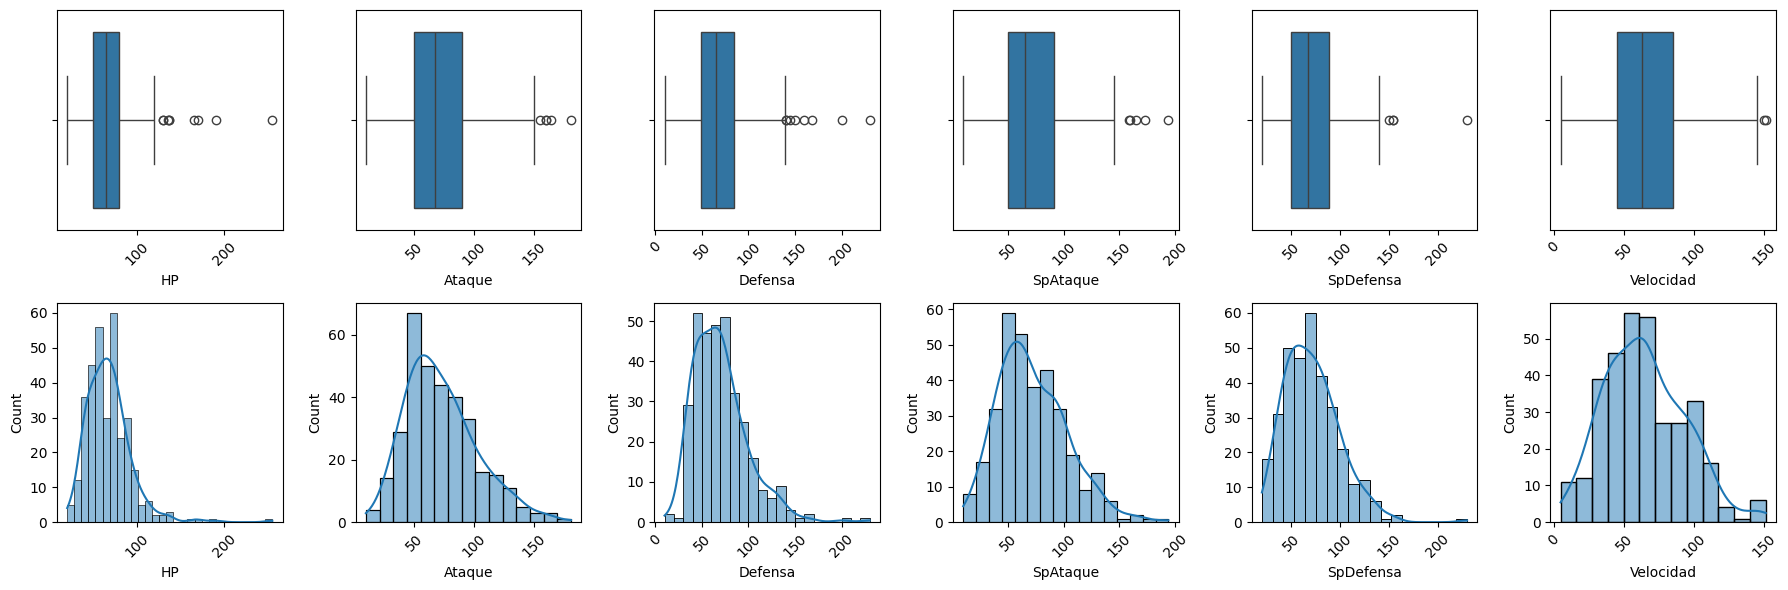

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

for i, name in enumerate(x_train_pokemon[['HP','Ataque','Defensa','SpAtaque','SpDefensa' ,'Velocidad']]):

    sns.boxplot(x=name, data=x_train_pokemon, orient='h', ax=axes[0, i])
    axes[0, i].tick_params(axis='x', rotation=45)

    sns.histplot(x=name, data=x_train_pokemon, ax=axes[1, i], kde=True)
    axes[1, i].tick_params(axis='x', rotation=45)


fig.tight_layout()
plt.show()

## 4 Realizar la estimación del atributo TipoPokemon utilizando árboles de decisión (Clasificación)

In [ ]:
decision_tree_pokemon_clas = DecisionTreeClassifier(random_state=5232)

param_grid = {'max_depth': [1,2,3,4,5,6,7,8], 'min_samples_leaf': [1,2,3,4,5,6,7], 'min_samples_split': [1,2,3,4,5,6], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4], 'criterion': ['gini', 'entropy'] }

grid_search = GridSearchCV(estimator=decision_tree_pokemon_clas, param_grid=param_grid, scoring='accuracy', cv=4, n_jobs=-1)

grid_search.fit(x_train_pokemon, y_train_pokemon)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1}


In [ ]:
decision_tree_pokemon_clas = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.1 ,criterion='gini', random_state=5232)

decision_tree_pokemon_clas.fit(x_train_pokemon, y_train_pokemon)

DecisionTreeClassifier(max_depth=4, min_weight_fraction_leaf=0.1,
                       random_state=5232)

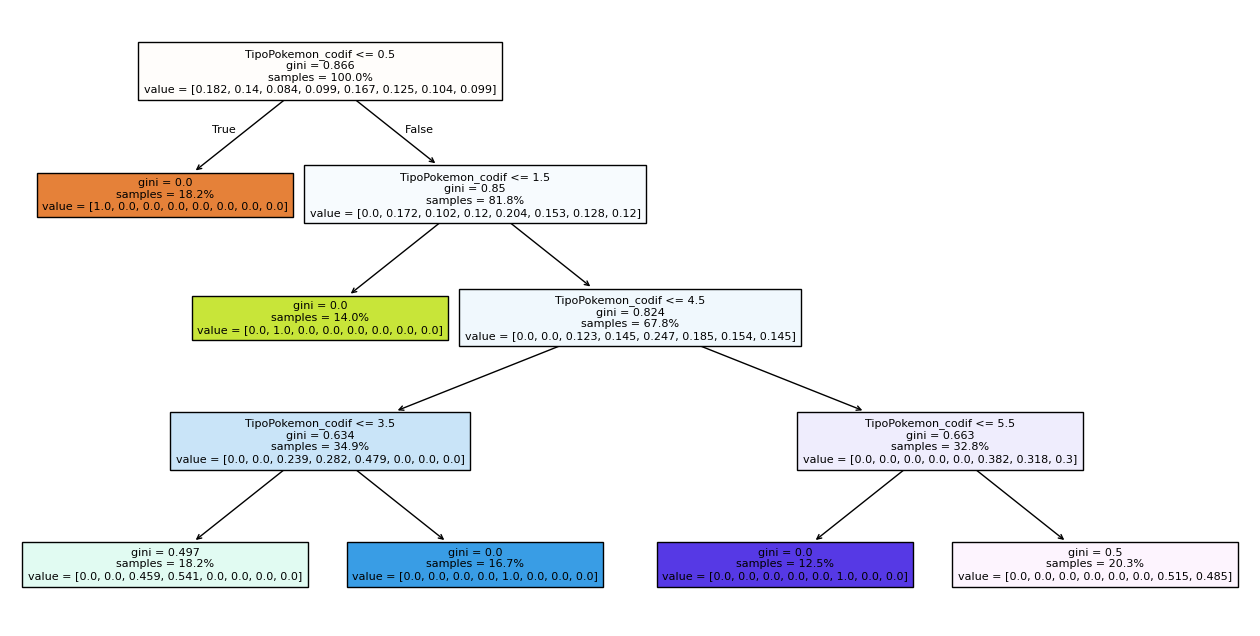

In [ ]:
features_pokemon = list(x_train_pokemon.columns)

plt.figure(figsize=(16,8))
tree.plot_tree(decision_tree_pokemon_clas, feature_names=features_pokemon, fontsize=8, filled=True,  proportion=True)
plt.show()

In [ ]:
predictions_train = decision_tree_pokemon_clas.predict(x_train_pokemon)

predictions_test1 = decision_tree_pokemon_clas.predict(x_test_pokemon1)
predictions_test2 = decision_tree_pokemon_clas.predict(x_test_pokemon2)
#--
accuracy_train = accuracy_score(y_train_pokemon, predictions_train)

accuracy_test1 = accuracy_score(y_test_pokemon1, predictions_test1)
accuracy_test2 = accuracy_score(y_test_pokemon2, predictions_test2)
#--
precision_train = precision_score(y_train_pokemon, predictions_train, average='weighted', zero_division=1)

precision_test1 = precision_score(y_test_pokemon1, predictions_test1, average='weighted', zero_division=1)
precision_test2 = precision_score(y_test_pokemon2, predictions_test2, average='weighted', zero_division=1)
#--
recall_train = recall_score(y_train_pokemon, predictions_train, average='weighted')

recall_test1 = recall_score(y_test_pokemon1, predictions_test1, average='weighted')
recall_test2 = recall_score(y_test_pokemon2, predictions_test2, average='weighted')

valores_resultados_pokemon = {'Accuracy': [accuracy_train,accuracy_test1,accuracy_test2], 'Precision': [precision_train,precision_test1,precision_test2], 'Recall': [recall_train,recall_test1,recall_test2]}
df_resultados = pd.DataFrame(valores_resultados_pokemon, index=['Train', 'Test 1', 'Test 2'])
df_resultados

,Accuracy,Precision,Recall
Train,0.817910,0.904081,0.817910
Test 1,0.833333,0.898459,0.833333
Test 2,0.847222,0.905182,0.847222


## 5.

* Realizar la estimación del atributo TipoPokemon utilizando Bayes Ingenuo. Aquí deberá considerar un criterio de división de los atributos para discretizarlos. Mostrar los resultados sobre ambos conjuntos de test (Precisión, Exhaustividad y Exactitud)